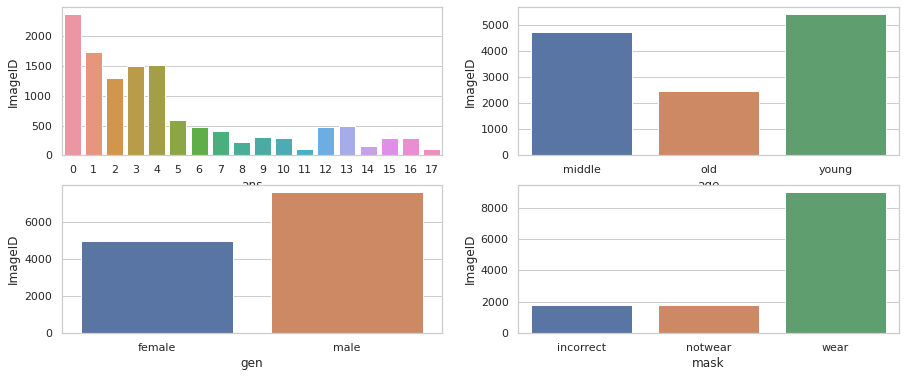

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def age(cls):
    if cls in [age for age in range(0, 18, 3)]:
        return 'young'
    elif cls in [age for age in range(1, 18, 3)]:
        return 'middle'
    else:
        return 'old'
def gender(cls):
    male_cls = np.concatenate([[i for i in range(gender, gender+3)] for gender in range(0, 18, 6)])
    if cls in male_cls:
        return 'male'
    else:
        return 'female'
        
def mask(cls):
    if cls in [i for i in range(6)]:
        return 'wear'
    elif cls in [i for i in range(6, 12)]:
        return 'incorrect'
    else:
        return 'notwear'

def showAnsDist(path, mode=None):
    sns.set_theme(style="whitegrid")
    sota_sm = pd.read_csv(path) 
    chart, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
    
    if mode is None:
        sota_sm['age'] = list(map(age, sota_sm.ans))
        age_sota = sota_sm.groupby(['age']).count()
        age_sota['age'] = age_sota.index
        sns.barplot(ax=axes[0][1], x='age', y='ImageID', data=age_sota)

        sota_sm['gen'] = list(map(gender, sota_sm.ans))
        gen_sota = sota_sm.groupby(['gen']).count()
        gen_sota['gen'] = gen_sota.index
        sns.barplot(ax=axes[1][0], x='gen', y='ImageID', data=gen_sota)
        

        sota_sm['mask'] = list(map(mask, sota_sm.ans))
        mask_sota = sota_sm.groupby(['mask']).count()
        mask_sota['mask'] = mask_sota.index
        sns.barplot(ax=axes[1][1], x='mask', y='ImageID', data=mask_sota)

    ans_sota = sota_sm.groupby(['ans']).count()
    ans_sota['ans'] = ans_sota.index
    sns.barplot(ax=axes[0][0], x='ans', y='ImageID', data=ans_sota)
# example
showAnsDist("./sota_output.csv")